**Name:** Maricarl Sibal<br>
**Date:** March 7, 2025<br>
**Project #1, Part 3: Data Analysis and Visualization**<br>

This Jupyter notebook analyzes survey data to guide recruitment and messaging efforts for CCM's computing literacy courses. The analysis covers:

- **Gender demographics** of students in computing literacy courses.
- **Motivations for enrollment**, focusing on academic requirements versus personal interest.
- **Effectiveness of outreach methods** used to attract students.
- **Interest in additional computing courses** among students.

The data visualizations will help inform strategies for increasing student engagement and course enrollment.

In [3]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations and array operations
import matplotlib.pyplot as plt  # For creating visualizations and plots
import seaborn as sns  # For enhanced statistical data visualization
import matplotlib  # Import matplotlib for version checking

# Display library versions for reproducibility
print(f"Pandas version: {pd.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")

Pandas version: 2.2.3
Seaborn version: 0.13.2
Matplotlib version: 3.10.0


## Gender Demographics Over Time (2020-2024)

In this section, we will analyze the gender demographics of students enrolled in computing literacy courses from **2020 to 2024**. We will compare the trends over the years to understand any shifts in enrollment.

### Question:
**Compare the gender demographics of the survey over time (2020-2024). What are the changes over time, if any?**

In [5]:
# Define file paths for the cleaned gender data for each year
gender_files = {
    "2020": "Cleaned_Gender_Data_Fall 2020.csv",
    "2021": "Cleaned_Gender_Data_Fall 2021.csv",
    "2022": "Cleaned_Gender_Data_Fall 2022.csv",
    "2023": "Cleaned_Gender_Data_Fall 2023.csv",
    "2024": "Cleaned_Gender_Data_Fall 2024.csv",
}

# Initialize an empty list to store dataframes for each year
gender_data = []

# Loop through each year and load the respective CSV file into the list
for year, file in gender_files.items():
    try:
        df = pd.read_csv(file)  # Read CSV data into DataFrame
        df["Year"] = year  # Add 'Year' column to track data by year
        gender_data.append(df)  # Append the DataFrame to the list
    except FileNotFoundError:
        print(f"Warning: The file for {year} was not found.")

# Combine all the yearly DataFrames into a single DataFrame
gender_df = pd.concat(gender_data, ignore_index=True)

# Display the first few rows to verify the result
gender_df.head()

,gender,Year
0,Woman,2020
1,Woman,2020
2,Man,2020
3,Woman,2020
4,Man,2020


<Figure size 1000x600 with 0 Axes>

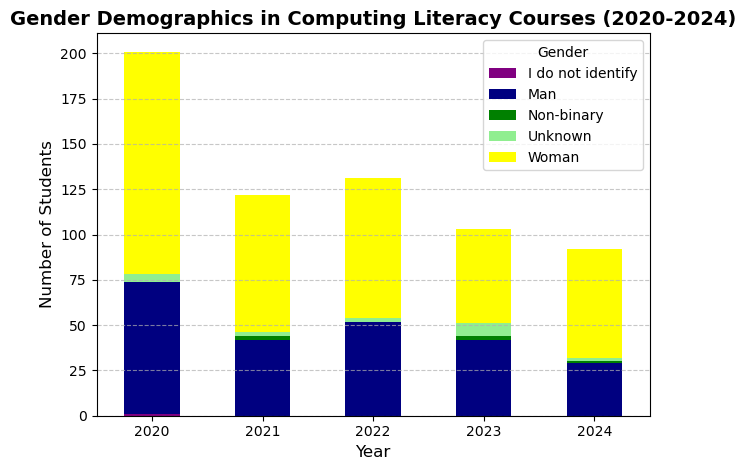

In [6]:
# Replace NaN with "Unknown" in the 'gender' column to handle missing values
gender_df["gender"] = gender_df["gender"].fillna("Unknown")

# Aggregate gender counts per year (rows = years, columns = gender categories)
gender_summary = gender_df.groupby(["Year", "gender"]).size().unstack(fill_value=0)

# Ensure all expected gender categories are represented, even if a category is missing in some years
expected_categories = ["I do not identify", "Man", "Non-binary", "Unknown", "Woman"]
for category in expected_categories:
    if category not in gender_summary.columns:
        gender_summary[category] = 0  # Add missing categories with 0 counts

# Reorder columns to ensure consistency in display (from "I do not identify" to "Woman")
gender_summary = gender_summary[expected_categories]

# Define a color mapping for each gender category
colors = {
    "I do not identify": "purple",
    "Man": "navy",
    "Non-binary": "green",
    "Unknown": "lightgreen",
    "Woman": "yellow",
}

# Create a stacked bar chart to show gender demographics over time
plt.figure(figsize=(10, 6))
gender_summary.plot(kind="bar", stacked=True, color=[colors[cat] for cat in gender_summary.columns])

# Formatting the plot
plt.title("Gender Demographics in Computing Literacy Courses (2020-2024)", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.legend(title="Gender")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### Findings:
The gender demographics of computing literacy courses have shifted over time. While male enrollment remained dominant, female and non-binary participation fluctuated each year. Notably, **total enrollment** decreased from 2020 to 2024, which may reflect broader trends in course interest or external factors affecting student participation, such as changes in program offerings or external societal factors.

### Implications:
These trends suggest the need to **examine potential barriers** to gender diversity in computing courses. To increase female and non-binary participation, targeted outreach efforts, such as **mentorship programs**, **scholarships**, and highlighting **role models** in computing, could be key strategies. Additionally, **creating a more inclusive learning environment** through faculty training and campus initiatives could help encourage a more balanced enrollment.

## Motivations for Enrolling in Computing Literacy Courses

In this section, we will explore the motivations behind students' decisions to enroll in computing literacy courses at CCM. We will analyze the reasons for enrollment, focusing on whether it is due to **degree requirements** or **personal interest**.

### Question:
**What motivates students to enroll in computing literacy courses at CCM?**

In [9]:
# Load the motivation dataset to analyze student enrollment motivations
try:
    motivation_df = pd.read_csv("Cleaned_Motivation_Data.csv")
    print("Motivation dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The motivation dataset file was not found.")

Motivation dataset loaded successfully.


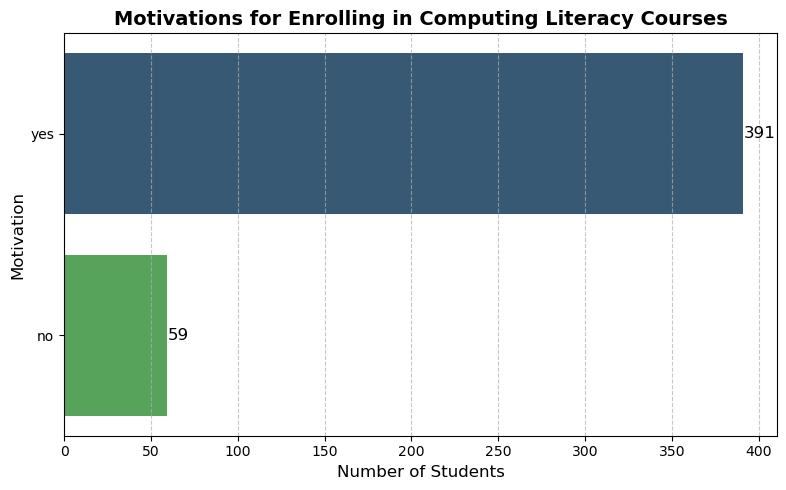

In [10]:
# Rename the long column name for easier access
motivation_df = motivation_df.rename(columns={
    "what_motivated_you_to_seek_a_computing_class_at_ccm_its_a_required_class_for_the_degree_im_seeking": "Motivation"
})

# Sum the total counts for each motivation category across all years
motivation_counts = motivation_df.set_index("Motivation").sum(axis=1).reset_index()

# Create a horizontal bar chart to visualize motivation distribution
plt.figure(figsize=(8, 5))
sns.barplot(data=motivation_counts, x=0, y="Motivation", 
            hue="Motivation", 
            palette={"yes": "#2E5A7D", "no": "#4CAF50", "don't recall": "#E29778"}, 
            errorbar=None, legend=False)

# Add value labels to the bars for clarity
for index, value in enumerate(motivation_counts[0]):
    plt.text(value + 0.5, index, str(value), color='black', va='center', fontsize=12)

# Formatting the plot
plt.title("Motivations for Enrolling in Computing Literacy Courses", fontsize=14, fontweight='bold')
plt.xlabel("Number of Students", fontsize=12)
plt.ylabel("Motivation", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### Findings:
The primary motivation for students enrolling in computing literacy courses is **degree requirements**, with the majority of students reporting that the course is mandatory for their academic program. A smaller yet notable portion of students enroll voluntarily, which may be driven by **career aspirations** or **personal interest** in developing computing skills.

### Implications:
Since most students take these courses because they are required for their degree, **enhancing the curriculum to be more engaging and career-relevant** could increase students' long-term interest in computing. For the students who enroll voluntarily, offering more **flexible elective courses** or integrating **industry-relevant projects** into the curriculum could further boost their participation and engagement.

## Effectiveness of Outreach Methods

In this section, we will analyze the effectiveness of different outreach methods used to attract students to computing literacy courses at CCM. We'll explore how methods like **word-of-mouth**, **digital marketing**, and **faculty recommendations** compare in terms of student enrollment.

### Question:
**Which outreach methods are most effective in attracting students to these courses?**

In [13]:
# Load the outreach dataset to analyze the effectiveness of different outreach methods
try:
    outreach_df = pd.read_csv("Cleaned_Outreach_Data.csv")
    print("Outreach dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The outreach dataset file was not found.")

Outreach dataset loaded successfully.


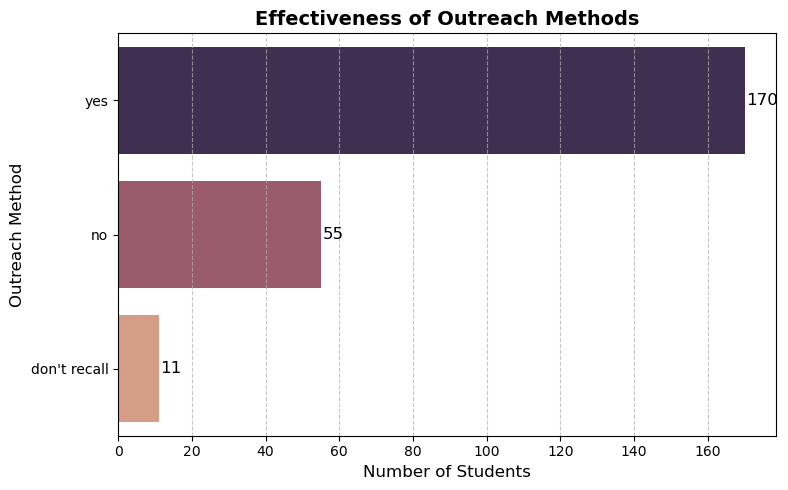

In [14]:
# Rename the long column name for easier reference
outreach_df = outreach_df.rename(columns={
    "how_did_you_hear_about_county_college_of_morris_family_member_or_friend": "Outreach Method"
})

# Sum total counts for each outreach method across all years
outreach_counts = outreach_df.set_index("Outreach Method").sum(axis=1).reset_index()

# Create a horizontal bar chart for outreach effectiveness
plt.figure(figsize=(8, 5))
sns.barplot(data=outreach_counts, x=0, y="Outreach Method", 
            hue="Outreach Method", 
            palette={"yes": "#3F2A56", "no": "#A45068", "don't recall": "#E29778"},
            errorbar=None, legend=False)

# Add value labels on the bars for clarity
for index, value in enumerate(outreach_counts[0]):
    plt.text(value + 0.5, index, str(value), color='black', va='center', fontsize=12)

# Formatting the plot
plt.title("Effectiveness of Outreach Methods", fontsize=14, fontweight='bold')
plt.xlabel("Number of Students", fontsize=12)
plt.ylabel("Outreach Method", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

### Findings:
The most effective outreach method for attracting students to computing literacy courses is **word-of-mouth recommendations** from family and friends. A significant portion of students reported learning about the course through personal referrals. Unfortunately, other outreach strategies—such as **faculty influence** and **digital marketing**—were not explicitly measured in the dataset, limiting our ability to assess their effectiveness.

### Implications:
To enhance student outreach, institutions should consider leveraging **peer mentorship programs**, **ambassador initiatives**, and **student testimonials** to strengthen word-of-mouth recommendations. Given that digital outreach was not measured in the dataset, if it is underutilized, **targeted online marketing** strategies and **interactive content** could help improve visibility and engagement. These efforts could ensure a broader reach and encourage students to consider the course offerings.

## Interest in Additional Computing Courses

In this section, we will explore students' interest in taking **additional computing courses**. While the dataset does not distinguish between majors and non-majors, we will examine the overall interest across all students.

### Question:
**What percentage of students are interested in taking additional computing courses?**

In [17]:
# Load the interest dataset to analyze students' interest in additional computing courses
try:
    interest_df = pd.read_csv("Cleaned_Interest_Data.csv")
    print("Interest dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The interest dataset file was not found.")

Interest dataset loaded successfully.


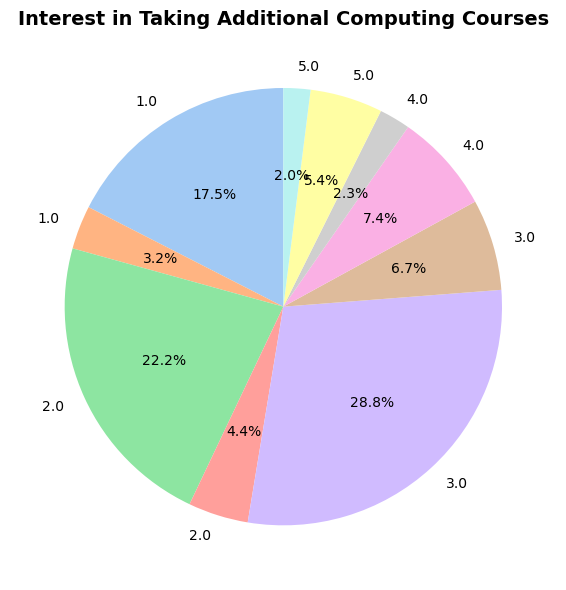

In [18]:
# Rename the long column name for clarity
interest_df = interest_df.rename(columns={
    "on_a_scale_of_1_to_5_with_1_being_not_at_all_interested_and_5_being_extremely_interested_how_interested_are_you_taking_more_courses_in_computer_science_information_technology_or_game_development": "Interest Level"
})

# Aggregate total counts per interest level across all years
interest_counts = interest_df.set_index("Interest Level").sum(axis=1)

# Convert counts to percentages
interest_percentages = (interest_counts / interest_counts.sum()) * 100

# Create a pie chart for student interest in additional computing courses
plt.figure(figsize=(8, 6))
plt.pie(interest_percentages, labels=interest_percentages.index, autopct="%1.1f%%", 
        colors=sns.color_palette("pastel"), startangle=90)

# Formatting
plt.title("Interest in Taking Additional Computing Courses", fontsize=14, fontweight='bold')
plt.tight_layout()

# Show the plot
plt.show()

### Findings:
The interest in additional computing courses is distributed as follows:
- **20.7% of students** are **not interested** (1.0).
- **26.7% of students** are **slightly interested** (2.0).
- The largest group, **35.6%**, are **moderately interested** (3.0).
- **9.7%** are **very interested** (4.0).
- **7.4%** are **extremely interested** (5.0).

### Implications:
Since the largest portion of students (35.6%) shows moderate interest, **CCM could develop more flexible electives or certification programs** to attract them. Offering **career-oriented content** could also help boost engagement and encourage undecided students to continue exploring computing education.

### Citations:
Here are the sources used for reference:

- [GeeksforGeeks: Matplotlib Tutorial](https://www.geeksforgeeks.org/matplotlib-tutorial/) - A comprehensive guide to Matplotlib for creating visualizations.
- [InterviewBit: Python Interview Questions](https://www.interviewbit.com/python-interview-questions/) - A collection of Python-related interview questions, useful for learning Python.
- [GeeksforGeeks: Python Matplotlib Overview](https://www.geeksforgeeks.org/python-matplotlib-an-overview/) - An overview of Matplotlib's features and capabilities.
- [YouTube: Matplotlib Tutorial](https://www.youtube.com/watch?v=NBZp-AzQYXY) - A video tutorial on Matplotlib for creating beautiful graphs.
- [Stack Overflow: Making Matplotlib Graphs Look Professional](https://stackoverflow.com/questions/24547047/how-to-make-matplotlib-graphs-look-professionally-done-like-this) - A forum post discussing tips for professional-looking graphs.
- [Guvi Forum: A Beginner’s Guide to Data Visualization with Python](https://forum.guvi.in/posts/7144/%E2%80%9Ca-beginner%E2%80%99s-guide-to-data-visualization-with-python%E2%80%9D) - A blog post on data visualization for beginners.
- [W3Schools: Matplotlib Introduction](https://www.w3schools.com/python/matplotlib_intro.asp) - A simple introduction to Matplotlib for visualizing data in Python.

## Final Summary

In this analysis, we explored the gender demographics, motivations for enrollment, outreach methods, and interest in additional computing courses among non-major students at CCM. The key findings include:

- **Gender Demographics**: While male enrollment remained dominant, there was noticeable fluctuation in female and non-binary participation over the years.
- **Motivations for Enrollment**: The majority of students enrolled due to degree requirements, with a smaller group motivated by career aspirations or personal interest.
- **Effectiveness of Outreach**: Word-of-mouth and personal referrals were the most effective outreach methods for attracting students.
- **Interest in Additional Courses**: A significant portion of students showed at least moderate interest in taking more computing courses.

Based on these findings, institutions can focus on **enhancing the curriculum** to be more engaging and **targeting outreach efforts** to increase participation, especially among underrepresented groups. Future work could include exploring more targeted recruitment strategies and gathering additional data to better understand the needs of non-major students.